In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
def getChainIds(lines):
  chainIds = []
  for l in lines:
    if l[21] not in chainIds:
      chainIds.append(l[21])

  return chainIds

def getProteinChain(chainId, lines):
  atoms = {}
  for l in lines:
    if l[21] == chainId and l[13:15] == 'CA':
      resSeq = int(l[22:26])
      x = float(l[30:38])
      y = float(l[39:46])
      z = float(l[47:54])
      atoms[resSeq] = {
          'name': l[17:20].strip(),
          'position': (x, y, z),
      }
  return atoms

def getRNAChain(chainId, lines):
  atoms = {}
  nucleotides = ['A', 'U', 'C', 'G']
  for l in lines:
    if l[21] == chainId and l[18:20].strip() in nucleotides:
      resSeq = int(l[22:26])
      x = float(l[30:38])
      y = float(l[39:46])
      z = float(l[47:54])
      atoms[resSeq] = {
          'name': l[17:20].strip(),
          'position': (x, y, z),
      }
  return atoms

def getProteinAminoacids(chainId, lines):
  atoms = {}
  for l in lines:
    if l[21] == chainId and l[13:15] == 'CA':
      resSeq = int(l[22:26])
      atoms[resSeq] = l[17:20].strip()
  return atoms

def getRNANucleotides(chainId, lines):
  atoms = {}
  nucleotides = ['A', 'U', 'C', 'G']
  for l in lines:
    if l[21] == chainId and l[18:20].strip() in nucleotides:
      resSeq = int(l[22:26])
      atoms[resSeq] = l[18:20].strip()
  return atoms

In [ ]:
import os

DATABASE_DIR = '/content/drive/MyDrive/structures'

def readFiles():
  proteinChains = {}
  RNAChains = {}
  for filename in os.listdir(DATABASE_DIR):
    with open(f'{DATABASE_DIR}/{filename}', 'r') as fr:
      lines = fr.readlines()
      structCode = filename[:4]
      chainIDs = getChainIds(lines)
      if len(chainIDs) == 2:
        for chainID in chainIDs:
          proteinChain = getProteinChain(chainID, lines)
          if proteinChain != {}:
            proteinChains[structCode] = proteinChain
          RNAChain = getRNAChain(chainID, lines)
          if RNAChain != {}:
            RNAChains[structCode] = RNAChain

  return proteinChains, RNAChains

proteinChains, RNAChains = readFiles()

In [ ]:
def getAtoms():
  proteinAminoacids = {}
  RNANucleotides = {}
  for filename in os.listdir(DATABASE_DIR):
    with open(f'{DATABASE_DIR}/{filename}', 'r') as fr:
      lines = fr.readlines()
      structCode = filename[:4]
      chainIDs = getChainIds(lines)
      if len(chainIDs) == 2:
        for chainID in chainIDs:
          proteinAminoacid = getProteinAminoacids(chainID, lines)
          if proteinAminoacid != {}:
            proteinAminoacids[structCode] = proteinAminoacid
          RNANucleotide = getRNANucleotides(chainID, lines)
          if RNANucleotide != {}:
            RNANucleotides[structCode] = RNANucleotide

  return proteinAminoacids, RNANucleotides

proteinAminoacids, RNANucleotides = getAtoms()

In [ ]:
from collections import Counter

protein_aminoacids = {}

for key, v in proteinAminoacids.items():
  res = Counter(v.values())
  protein_aminoacids[key] = res

In [ ]:
import pandas as pd

plot_protein_data = []

for key, values in proteinChains.items():
  plot_protein_data.append(
      [
          key,
          len(values)
      ]
  )


protein_df = pd.DataFrame (
    plot_protein_data,
    columns = [
        'Structure',
        'Number of amino acids'
    ]
)

protein_df

Structure  Number of amino acids
0        1a4t                     19
1        1biv                     17
2        1aud                    101
3        1exy                     16
4        1emi                    136
..        ...                    ...
193      8fti                    737
194      8e28                    690
195      8e2a                    686
196      8as6                   1566
197      8acc                    231

[198 rows x 2 columns]

In [ ]:
plot_protein_aminoacides_data = []

for key, values in proteinChains.items():
  plot_protein_aminoacides_data.append(
      [
          key,
          protein_aminoacids[key]['ALA'],
          protein_aminoacids[key]['ARG'],
          protein_aminoacids[key]['ASN'],
          protein_aminoacids[key]['ASP'],
          protein_aminoacids[key]['CYS'],
          protein_aminoacids[key]['GLN'],
          protein_aminoacids[key]['GLU'],
          protein_aminoacids[key]['GLY'],
          protein_aminoacids[key]['HIS'],
          protein_aminoacids[key]['LEU'],
          protein_aminoacids[key]['ILE'],
          protein_aminoacids[key]['LYS'],
          protein_aminoacids[key]['MET'],
          protein_aminoacids[key]['PHE'],
          protein_aminoacids[key]['PRO'],
          protein_aminoacids[key]['SER'],
          protein_aminoacids[key]['THR'],
          protein_aminoacids[key]['TRP'],
          protein_aminoacids[key]['TYR'],
          protein_aminoacids[key]['VAL'],
      ]
  )


protein_aminoacides_df = pd.DataFrame (
    plot_protein_aminoacides_data,
    columns = [
        'Structure',
        'ALA',
        'ARG',
        'ASN',
        'ASP',
        'CYS',
        'GLN',
        'GLU',
        'GLY',
        'HIS',
        'LEU',
        'ILE',
        'LYS',
        'MET',
        'PHE',
        'PRO',
        'SER',
        'THR',
        'TRP',
        'TYR',
        'VAL',
    ]
)

print(protein_aminoacides_df)

    Structure  ALA  ARG  ASN  ASP  CYS  GLN  GLU  GLY  HIS  ...  ILE  LYS  \
0        1a4t    2    6    1    1    0    0    2    0    1  ...    1    2   
1        1biv    0    7    0    0    0    0    0    4    0  ...    1    1   
2        1aud    7    6    5    5    0    4    4    4    2  ...   10   11   
3        1exy    0    7    0    0    0    1    0    0    0  ...    0    2   
4        1emi    6   20    1    7    1    2   10   13    2  ...   12    9   
..        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
193      8fti   51   56   28   46   14   23   59   47   22  ...   39   73   
194      8e28   52   41   16   41   15   31   49   31   19  ...   32   42   
195      8e2a   52   41   15   42   15   30   48   31   19  ...   32   42   
196      8as6   97   94   58   78   26   47  114   91   40  ...   83  104   
197      8acc   22   15   11   11    2   15   13   12    6  ...   16    8   

     MET  PHE  PRO  SER  THR  TRP  TYR  VAL  
0      0    0    0    0    2 

In [ ]:
columns = [
    'ALA',
    'ARG',
    'ASN',
    'ASP',
    'CYS',
    'GLN',
    'GLU',
    'GLY',
    'HIS',
    'LEU',
    'ILE',
    'LYS',
    'MET',
    'PHE',
    'PRO',
    'SER',
    'THR',
    'TRP',
    'TYR',
    'VAL',
]

tot_aminoacids = []
for column in columns:
  tot = protein_aminoacides_df[column].sum()
  tot_aminoacids.append(tot)

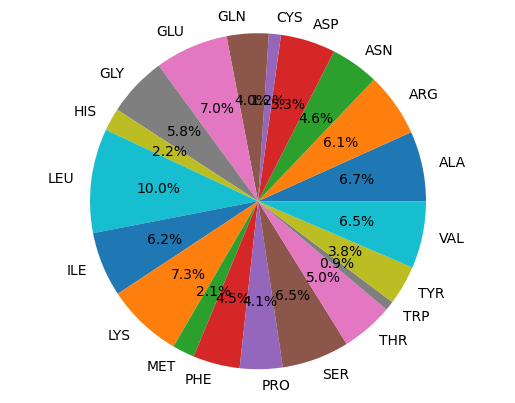

In [ ]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.pie(tot_aminoacids,
        labels=columns,
        autopct='%1.1f%%')

ax1.axis('equal')
plt.show()

In [ ]:
rna_nucleotides = {}

for key, v in RNANucleotides.items():
  res = Counter(v.values())
  rna_nucleotides[key] = res

In [ ]:
plot_rna_data = []

for key, values in RNAChains.items():
  plot_rna_data.append(
      [
          key,
          len(values)
      ]
  )

rna_df = pd.DataFrame (
    plot_rna_data,
    columns = [
        'Structure',
        'Number of nucleotides'
    ]
)

rna_df

Structure  Number of nucleotides
0        1a4t                     15
1        1biv                     28
2        1aud                     30
3        1exy                     33
4        1emi                    161
..        ...                    ...
193      8fti                     97
194      8e28                     15
195      8e2a                     15
196      8as6                     14
197      8acc                      5

[198 rows x 2 columns]

In [ ]:
plot_rna_nucleotides_data = []

for key, values in RNAChains.items():
  plot_rna_nucleotides_data.append(
      [
          key,
          rna_nucleotides[key]['A'],
          rna_nucleotides[key]['U'],
          rna_nucleotides[key]['C'],
          rna_nucleotides[key]['G'],
      ]
  )

rna_nucleotides_df = pd.DataFrame (
    plot_rna_nucleotides_data,
    columns = [
        'Structure',
        'A',
        'U',
        'C',
        'G',
    ]
)

rna_nucleotides_df

Structure   A   U   C   G
0        1a4t   4   1   5   5
1        1biv   4   7   9   8
2        1aud   5   6  10   9
3        1exy   6   4  11  12
4        1emi  33  39  39  50
..        ...  ..  ..  ..  ..
193      8fti  26  28  19  24
194      8e28   0  14   1   0
195      8e2a   0   7   4   4
196      8as6   5   0   6   3
197      8acc   0   5   0   0

[198 rows x 5 columns]

In [ ]:
columns = [
    'A',
    'U',
    'C',
    'G',
]

tot_nucleotides = []
for column in columns:
  tot = rna_nucleotides_df[column].sum()
  tot_nucleotides.append(tot)

In [ ]:
tot_nucleotides


[1887, 1758, 1805, 2091]

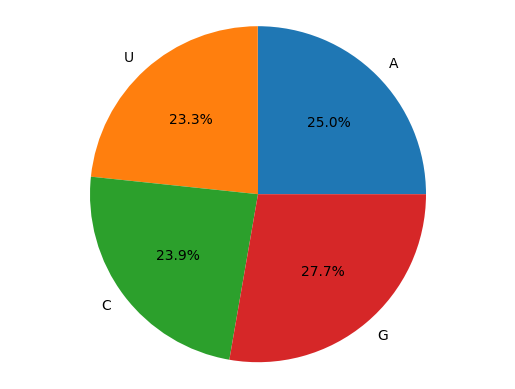

In [ ]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.pie(tot_nucleotides,
        labels=columns,
        autopct='%1.1f%%')

ax1.axis('equal')
plt.show()

In [ ]:
df = pd.merge(protein_df, rna_df, on = "Structure")

df

Structure  Number of amino acids  Number of nucleotides
0        1a4t                     19                     15
1        1biv                     17                     28
2        1aud                    101                     30
3        1exy                     16                     33
4        1emi                    136                    161
..        ...                    ...                    ...
193      8fti                    737                     97
194      8e28                    690                     15
195      8e2a                    686                     15
196      8as6                   1566                     14
197      8acc                    231                      5

[198 rows x 3 columns]

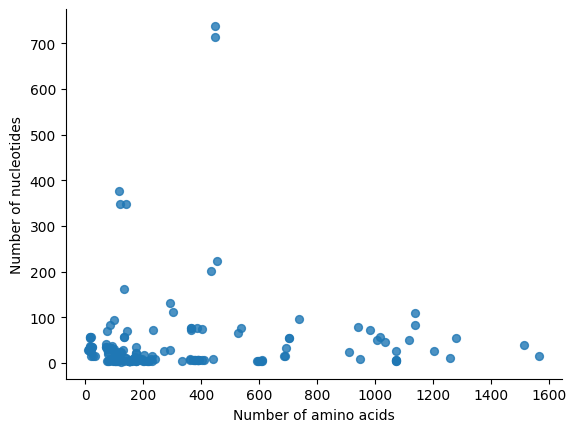

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Number of amino acids', y='Number of nucleotides', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

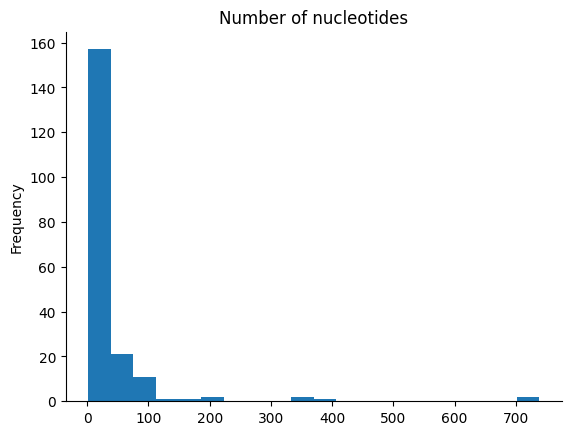

In [ ]:
from matplotlib import pyplot as plt
df['Number of nucleotides'].plot(kind='hist', bins=20, title='Number of nucleotides')
plt.gca().spines[['top', 'right',]].set_visible(False)

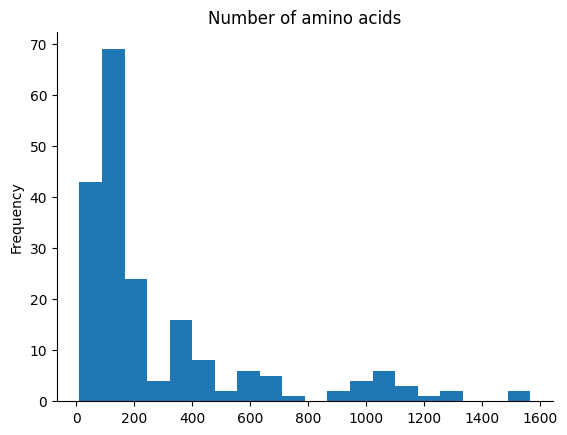

In [ ]:
from matplotlib import pyplot as plt
df['Number of amino acids'].plot(kind='hist', bins=20, title='Number of amino acids')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import pandas as pd

plot_rna_data = []

for key, values in RNAChains.items():
  if len(values) < 150:
    plot_rna_data.append([key, len(values)])


rna_df = pd.DataFrame(plot_rna_data, columns=['Structure', 'Number of nucleotides'])
print(rna_df)

    Structure  Number of nucleotides
0        1a4t                     15
1        1biv                     28
2        1aud                     30
3        1exy                     33
4        1etf                     34
..        ...                    ...
185      8fti                     97
186      8e28                     15
187      8e2a                     15
188      8as6                     14
189      8acc                      5

[190 rows x 2 columns]


In [ ]:
plot_protein_data = []

for key, values in proteinChains.items():
  if len(values) < 800:
    plot_protein_data.append([key, len(values)])

protein_df = pd.DataFrame(plot_protein_data, columns=['Structure', 'Number of amino acids'])
print(protein_df)

    Structure  Number of amino acids
0        1a4t                     19
1        1biv                     17
2        1aud                    101
3        1exy                     16
4        1emi                    136
..        ...                    ...
173      7zpi                    705
174      8fti                    737
175      8e28                    690
176      8e2a                    686
177      8acc                    231

[178 rows x 2 columns]


In [ ]:
df = pd.merge(protein_df, rna_df, on = "Structure")

df

Structure  Number of amino acids  Number of nucleotides
0        1a4t                     19                     15
1        1biv                     17                     28
2        1aud                    101                     30
3        1exy                     16                     33
4        1etf                     23                     34
..        ...                    ...                    ...
165      7zpi                    705                     55
166      8fti                    737                     97
167      8e28                    690                     15
168      8e2a                    686                     15
169      8acc                    231                      5

[170 rows x 3 columns]

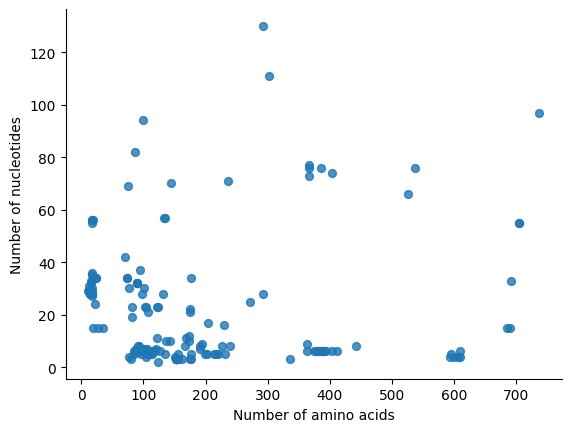

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Number of amino acids', y='Number of nucleotides', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

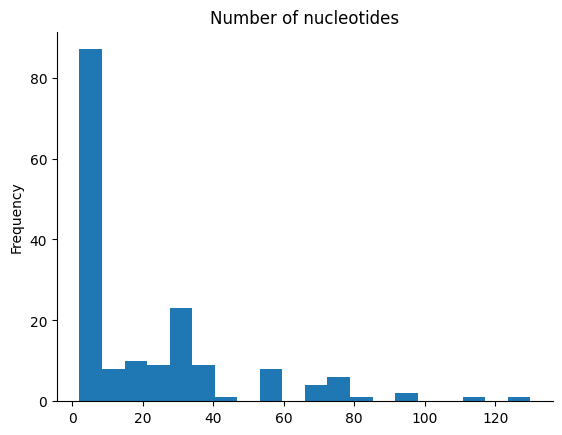

In [ ]:
from matplotlib import pyplot as plt
df['Number of nucleotides'].plot(kind='hist', bins=20, title='Number of nucleotides')
plt.gca().spines[['top', 'right',]].set_visible(False)

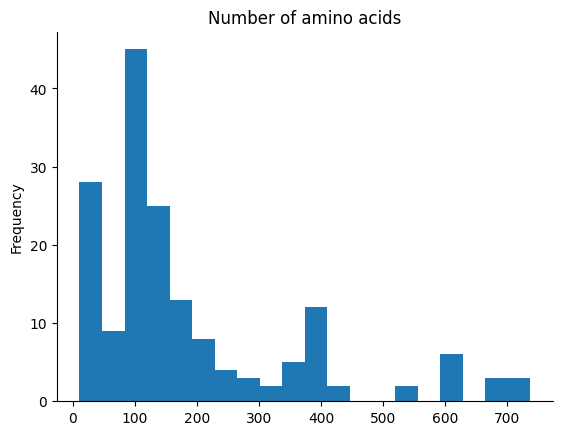

In [ ]:
from matplotlib import pyplot as plt
df['Number of amino acids'].plot(kind='hist', bins=20, title='Number of amino acids')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import math

def dist(a1, a2):
  p1 = a1['position']
  p2 = a2['position']
  x = 0
  y = 1
  z = 2
  return math.sqrt((p1[x] - p2[x])**2 + (p1[y] - p2[y])**2 + (p1[z] - p2[z])**2)

def distMap(proteinAtoms, RNAAtoms):
  m = []
  i = 0
  for a1 in proteinAtoms:
    for a2 in RNAAtoms:
      distance = dist(proteinAtoms[a1], RNAAtoms[a2])

      if distance < 5:
        m.append({
            'from': proteinAtoms[a1]['name'],
            'to': RNAAtoms[a2]['name'],
            'dist': distance
        })
        i+=1
  return m

In [ ]:
proteinChains

{'1a4t': {1: {'name': 'ASN', 'position': (9.372, 1.492, 4.444)},
  2: {'name': 'ALA', 'position': (6.572, 3.507, 2.733)},
  3: {'name': 'LYS', 'position': (3.577, 1.426, 3.856)},
  4: {'name': 'THR', 'position': (1.198, 4.256, 5.105)},
  5: {'name': 'ARG', 'position': (2.346, 6.94, 2.538)},
  6: {'name': 'ARG', 'position': (1.534, 4.535, -0.398)},
  7: {'name': 'HIS', 'position': (-1.57, 3.128, 1.526)},
  8: {'name': 'GLU', 'position': (-3.236, 6.668, 1.789)},
  9: {'name': 'ARG', 'position': (-3.485, 7.004, -2.104)},
  10: {'name': 'ARG', 'position': (-4.3, 3.261, -2.86)},
  11: {'name': 'ARG', 'position': (-6.803, 3.042, 0.151)},
  12: {'name': 'LYS', 'position': (-8.969, 5.896, -1.38)},
  13: {'name': 'LEU', 'position': (-9.46, 3.84, -4.641)},
  14: {'name': 'ALA', 'position': (-9.698, 0.384, -2.905)},
  15: {'name': 'ILE', 'position': (-12.479, 1.683, -0.598)},
  16: {'name': 'GLU', 'position': (-14.31, 3.449, -3.509)},
  17: {'name': 'ARG', 'position': (-14.344, 0.05, -5.504)},
  

In [ ]:
RNAChains

{'1a4t': {4: {'name': 'G', 'position': (9.16, 6.779, 6.956)},
  5: {'name': 'C', 'position': (9.761, 5.82, 1.34)},
  6: {'name': 'G', 'position': (9.649, -1.003, -6.674)},
  7: {'name': 'C', 'position': (5.241, 1.101, -5.212)},
  8: {'name': 'U', 'position': (2.806, -3.237, -5.419)},
  9: {'name': 'G', 'position': (0.512, -5.584, 3.257)},
  10: {'name': 'A', 'position': (-6.161, -8.154, 6.65)},
  11: {'name': 'C', 'position': (-9.075, -0.751, 0.884)},
  12: {'name': 'A', 'position': (-0.818, -11.213, 6.505)},
  13: {'name': 'A', 'position': (3.17, -12.318, 3.815)},
  14: {'name': 'A', 'position': (5.18, -9.007, -0.863)},
  15: {'name': 'G', 'position': (7.198, -6.767, -4.859)},
  16: {'name': 'C', 'position': (11.453, -7.24, -1.788)},
  17: {'name': 'G', 'position': (11.848, 3.116, -5.958)},
  18: {'name': 'C', 'position': (15.953, 0.141, -5.987)}},
 '1biv': {4: {'name': 'G', 'position': (16.065, 3.183, 15.017)},
  5: {'name': 'G', 'position': (22.735, 7.755, 2.304)},
  6: {'name': 'C'

In [ ]:
def getChain(chainId, lines):
  atoms = {}
  nucleotides = ['A', 'U', 'C', 'G']
  for l in lines:
    if l[21] == chainId and l[18:20].strip() in nucleotides:
      resSeq = int(l[22:26])
      x = float(l[30:38])
      y = float(l[39:46])
      z = float(l[47:54])
      atoms[resSeq] = {
          'name': l[18:20].strip(),
          'position': (x, y, z),
      }
    elif l[21] == chainId and l[13:15] == 'CA':
      resSeq = int(l[22:26])
      x = float(l[30:38])
      y = float(l[39:46])
      z = float(l[47:54])
      atoms[resSeq] = {
          'name': l[17:20].strip(),
          'position': (x, y, z),
      }
  return atoms

def getChains():
  chains = {}
  for filename in os.listdir(DATABASE_DIR):
    with open(f'{DATABASE_DIR}/{filename}', 'r') as fr:
      lines = fr.readlines()
      structCode = filename[:4]
      chainIDs = getChainIds(lines)
      if len(chainIDs) == 2:
        for chainID in chainIDs:
          chain = getChain(chainID, lines)
          if chain != {}:
            chains[structCode] = chain

  return chains

chains = getChains()
chains

{'1a4t': {1: {'name': 'ASN', 'position': (9.372, 1.492, 4.444)},
  2: {'name': 'ALA', 'position': (6.572, 3.507, 2.733)},
  3: {'name': 'LYS', 'position': (3.577, 1.426, 3.856)},
  4: {'name': 'THR', 'position': (1.198, 4.256, 5.105)},
  5: {'name': 'ARG', 'position': (2.346, 6.94, 2.538)},
  6: {'name': 'ARG', 'position': (1.534, 4.535, -0.398)},
  7: {'name': 'HIS', 'position': (-1.57, 3.128, 1.526)},
  8: {'name': 'GLU', 'position': (-3.236, 6.668, 1.789)},
  9: {'name': 'ARG', 'position': (-3.485, 7.004, -2.104)},
  10: {'name': 'ARG', 'position': (-4.3, 3.261, -2.86)},
  11: {'name': 'ARG', 'position': (-6.803, 3.042, 0.151)},
  12: {'name': 'LYS', 'position': (-8.969, 5.896, -1.38)},
  13: {'name': 'LEU', 'position': (-9.46, 3.84, -4.641)},
  14: {'name': 'ALA', 'position': (-9.698, 0.384, -2.905)},
  15: {'name': 'ILE', 'position': (-12.479, 1.683, -0.598)},
  16: {'name': 'GLU', 'position': (-14.31, 3.449, -3.509)},
  17: {'name': 'ARG', 'position': (-14.344, 0.05, -5.504)},
  

In [ ]:
chains['8d49']

{4: {'name': 'A', 'position': (166.843, 159.346, 116.148)},
 5: {'name': 'U', 'position': (164.185, 157.817, 123.14)},
 6: {'name': 'U', 'position': (157.023, 162.34, 127.308)},
 7: {'name': 'U', 'position': (159.96, 158.86, 128.481)},
 8: {'name': 'C', 'position': (160.768, 154.31, 128.431)},
 9: {'name': 'U', 'position': (162.112, 150.784, 126.282)},
 10: {'name': 'A', 'position': (162.129, 149.06, 120.939)},
 11: {'name': 'C', 'position': (165.705, 150.467, 119.525)},
 12: {'name': 'U', 'position': (167.078, 151.721, 115.089)},
 13: {'name': 'A', 'position': (169.896, 156.152, 113.685)},
 14: {'name': 'U', 'position': (161.785, 155.362, 109.773)},
 15: {'name': 'U', 'position': (165.239, 165.769, 108.603)},
 16: {'name': 'G', 'position': (163.125, 157.397, 115.78)},
 17: {'name': 'U', 'position': (159.545, 155.53, 116.271)},
 18: {'name': 'A', 'position': (157.342, 151.328, 119.542)},
 19: {'name': 'G', 'position': (155.131, 150.77, 123.226)},
 20: {'name': 'A', 'position': (154.151

In [ ]:
import plotly.express as px

# fig = px.imshow(distMap(chains['8d49']))
# fig.show()

In [ ]:
chains['8d49']

{4: {'name': 'A', 'position': (166.843, 159.346, 116.148)},
 5: {'name': 'U', 'position': (164.185, 157.817, 123.14)},
 6: {'name': 'U', 'position': (157.023, 162.34, 127.308)},
 7: {'name': 'U', 'position': (159.96, 158.86, 128.481)},
 8: {'name': 'C', 'position': (160.768, 154.31, 128.431)},
 9: {'name': 'U', 'position': (162.112, 150.784, 126.282)},
 10: {'name': 'A', 'position': (162.129, 149.06, 120.939)},
 11: {'name': 'C', 'position': (165.705, 150.467, 119.525)},
 12: {'name': 'U', 'position': (167.078, 151.721, 115.089)},
 13: {'name': 'A', 'position': (169.896, 156.152, 113.685)},
 14: {'name': 'U', 'position': (161.785, 155.362, 109.773)},
 15: {'name': 'U', 'position': (165.239, 165.769, 108.603)},
 16: {'name': 'G', 'position': (163.125, 157.397, 115.78)},
 17: {'name': 'U', 'position': (159.545, 155.53, 116.271)},
 18: {'name': 'A', 'position': (157.342, 151.328, 119.542)},
 19: {'name': 'G', 'position': (155.131, 150.77, 123.226)},
 20: {'name': 'A', 'position': (154.151

In [ ]:
distMap(proteinChains['8d49'], RNAChains['8d49'])

[{'from': 'PHE', 'to': 'U', 'dist': 4.811713727976755},
 {'from': 'LYS', 'to': 'U', 'dist': 4.936800684653974},
 {'from': 'ASN', 'to': 'U', 'dist': 4.7245406125886955},
 {'from': 'HIS', 'to': 'U', 'dist': 4.8630185070591585},
 {'from': 'ASP', 'to': 'A', 'dist': 4.369761320713088}]

In [ ]:
interactions = []

for key, values in proteinChains.items():
  d = distMap(proteinChains[key], RNAChains[key])
  for val in d:
    interactions.append(val)

interactions

[{'from': 'ALA', 'to': 'C', 'dist': 4.178533115819474},
 {'from': 'ARG', 'to': 'C', 'dist': 4.481754344004142},
 {'from': 'ALA', 'to': 'C', 'dist': 4.004107266295447},
 {'from': 'ILE', 'to': 'C', 'dist': 4.439357611186556},
 {'from': 'GLY', 'to': 'U', 'dist': 4.550638306875201},
 {'from': 'GLY', 'to': 'C', 'dist': 4.544237009663998},
 {'from': 'PRO', 'to': 'C', 'dist': 4.831805459659981},
 {'from': 'GLY', 'to': 'C', 'dist': 3.823627204631749},
 {'from': 'GLY', 'to': 'U', 'dist': 2.83186334416052},
 {'from': 'ILE', 'to': 'U', 'dist': 4.806957769733369},
 {'from': 'ARG', 'to': 'G', 'dist': 4.7629168583967525},
 {'from': 'LYS', 'to': 'G', 'dist': 3.5953949713487634},
 {'from': 'ASP', 'to': 'G', 'dist': 4.635934210059486},
 {'from': 'PRO', 'to': 'C', 'dist': 4.495993327397193},
 {'from': 'GLY', 'to': 'C', 'dist': 4.22872439395146},
 {'from': 'GLY', 'to': 'A', 'dist': 3.9523504399281215},
 {'from': 'VAL', 'to': 'A', 'dist': 4.549843513792515},
 {'from': 'VAL', 'to': 'A', 'dist': 4.931218307

In [ ]:
from collections import Counter

aminoacids = [
    'ALA',
    'ARG',
    'ASN',
    'ASP',
    'CYS',
    'GLN',
    'GLU',
    'GLY',
    'HIS',
    'LEU',
    'ILE',
    'LYS',
    'MET',
    'PHE',
    'PRO',
    'SER',
    'THR',
    'TRP',
    'TYR',
    'VAL',
]

nucleotides = [
    'A',
    'U',
    'C',
    'G',
]

def getList(aminoacid):
  resp = []
  for i in interactions:
    if i['from'] == aminoacid:
      resp.append(i['to'])

  return resp

interaction_stats = {}

for val in interactions:
  interaction_stats[val['from']] = getList(val['from'])

interaction_stats

{'ALA': ['C',
  'C',
  'A',
  'A',
  'U',
  'A',
  'A',
  'U',
  'C',
  'C',
  'A',
  'A',
  'U',
  'U',
  'U',
  'C',
  'A',
  'A',
  'G',
  'A',
  'A',
  'G',
  'G',
  'A',
  'A',
  'G',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A',
  'G',
  'C',
  'A',
  'A',
  'G',
  'G',
  'C',
  'C',
  'A',
  'U',
  'A',
  'G',
  'A',
  'A',
  'A',
  'A'],
 'ARG': ['C',
  'G',
  'G',
  'A',
  'G',
  'G',
  'A',
  'U',
  'U',
  'U',
  'U',
  'U',
  'U',
  'C',
  'C',
  'A',
  'G',
  'G',
  'G',
  'A',
  'G',
  'A',
  'A',
  'C',
  'A',
  'G',
  'A',
  'A',
  'U',
  'A',
  'A',
  'A',
  'C',
  'U',
  'A',
  'U',
  'G',
  'U',
  'G',
  'G',
  'A',
  'A',
  'U',
  'C',
  'G',
  'G',
  'G',
  'G',
  'U',
  'U',
  'C',
  'U',
  'C',
  'U',
  'U',
  'G',
  'G',
  'U',
  'G',
  'A',
  'U',
  'A',
  'U',
  'A',
  'A',
  'U'],
 'ILE': ['C',
  'U',
  'A',
  'U',
  'U',
  'A',
  'U',
  'G',
  'G',
  'A',
  'A',
  'A',
  'A',
  'U',
  'A',
  'A',
  'A',
  'U',
  'G',
  'G',
  'C',
  'U',
  'U',
  'G'],
 'GLY': ['

In [ ]:
frequency = {}

for key, stat in interaction_stats.items():
  frequency[key] = {
      nucleotides[0]: stat.count(nucleotides[0]),
      nucleotides[1]: stat.count(nucleotides[1]),
      nucleotides[2]: stat.count(nucleotides[2]),
      nucleotides[3]: stat.count(nucleotides[3])
  }

frequency

{'ALA': {'A': 26, 'U': 6, 'C': 8, 'G': 8},
 'ARG': {'A': 19, 'U': 20, 'C': 8, 'G': 19},
 'ILE': {'A': 9, 'U': 8, 'C': 2, 'G': 5},
 'GLY': {'A': 24, 'U': 30, 'C': 25, 'G': 25},
 'PRO': {'A': 12, 'U': 6, 'C': 9, 'G': 5},
 'LYS': {'A': 13, 'U': 9, 'C': 13, 'G': 12},
 'ASP': {'A': 4, 'U': 3, 'C': 2, 'G': 8},
 'VAL': {'A': 17, 'U': 6, 'C': 1, 'G': 4},
 'TYR': {'A': 7, 'U': 3, 'C': 1, 'G': 6},
 'GLN': {'A': 4, 'U': 1, 'C': 2, 'G': 7},
 'LEU': {'A': 11, 'U': 2, 'C': 1, 'G': 8},
 'ASN': {'A': 14, 'U': 8, 'C': 3, 'G': 6},
 'THR': {'A': 4, 'U': 4, 'C': 3, 'G': 0},
 'HIS': {'A': 4, 'U': 3, 'C': 1, 'G': 6},
 'MET': {'A': 9, 'U': 0, 'C': 0, 'G': 4},
 'SER': {'A': 18, 'U': 1, 'C': 3, 'G': 16},
 'GLU': {'A': 6, 'U': 2, 'C': 0, 'G': 3},
 'PHE': {'A': 10, 'U': 6, 'C': 0, 'G': 3},
 'TRP': {'A': 1, 'U': 1, 'C': 0, 'G': 0},
 'CYS': {'A': 1, 'U': 1, 'C': 1, 'G': 0}}

In [ ]:
plot_frequency_data = []

for key, values in frequency.items():
  plot_frequency_data.append(
      [
          key,
          frequency[key]['A'],
          frequency[key]['U'],
          frequency[key]['C'],
          frequency[key]['G'],
      ]
  )

frequency_df = pd.DataFrame (
    plot_frequency_data,
    columns = [
        'Aminoacid',
        'A',
        'U',
        'C',
        'G',
    ]
)

frequency_df

Aminoacid   A   U   C   G
0        ALA  26   6   8   8
1        ARG  19  20   8  19
2        ILE   9   8   2   5
3        GLY  24  30  25  25
4        PRO  12   6   9   5
5        LYS  13   9  13  12
6        ASP   4   3   2   8
7        VAL  17   6   1   4
8        TYR   7   3   1   6
9        GLN   4   1   2   7
10       LEU  11   2   1   8
11       ASN  14   8   3   6
12       THR   4   4   3   0
13       HIS   4   3   1   6
14       MET   9   0   0   4
15       SER  18   1   3  16
16       GLU   6   2   0   3
17       PHE  10   6   0   3
18       TRP   1   1   0   0
19       CYS   1   1   1   0

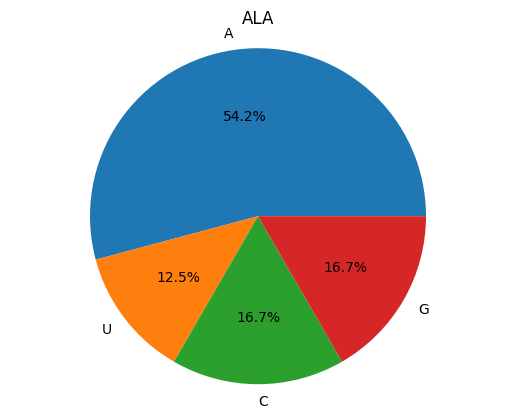

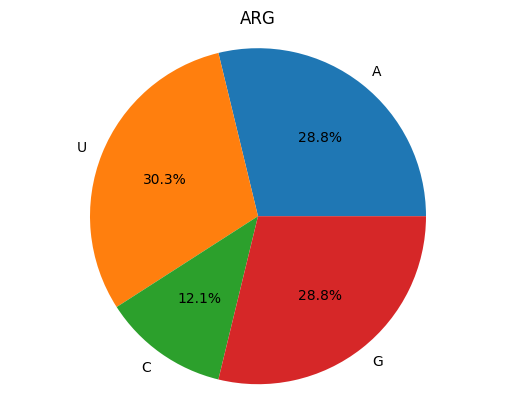

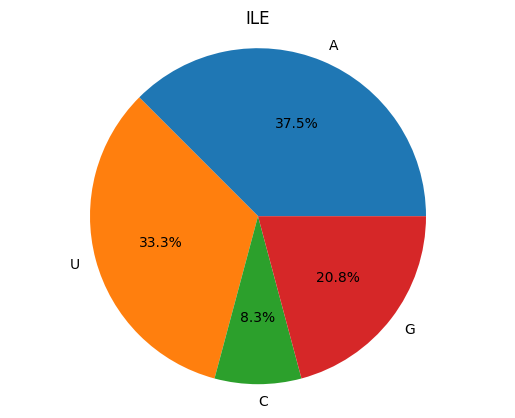

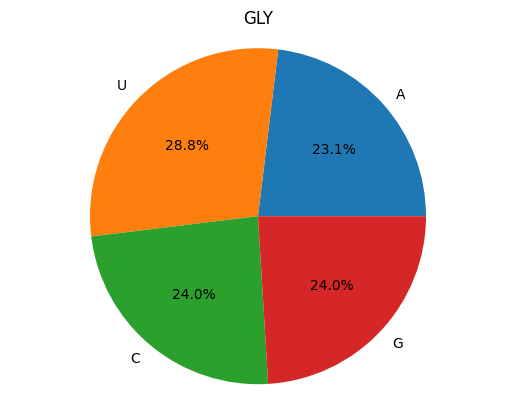

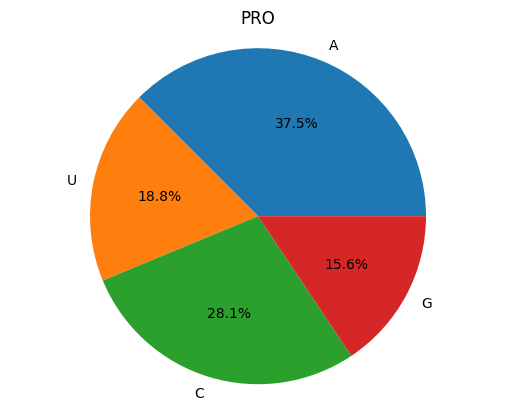

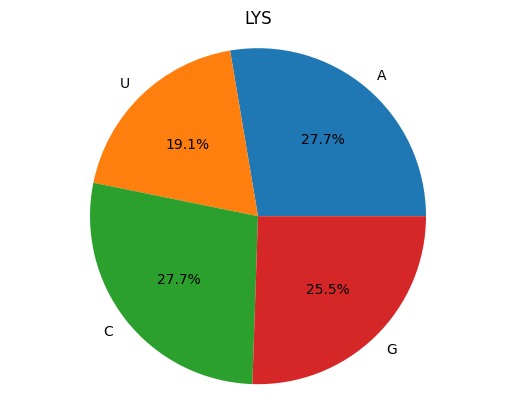

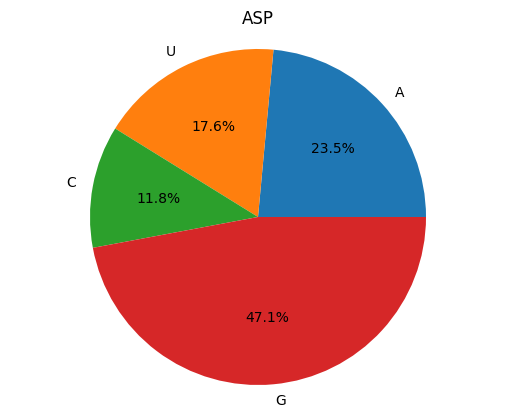

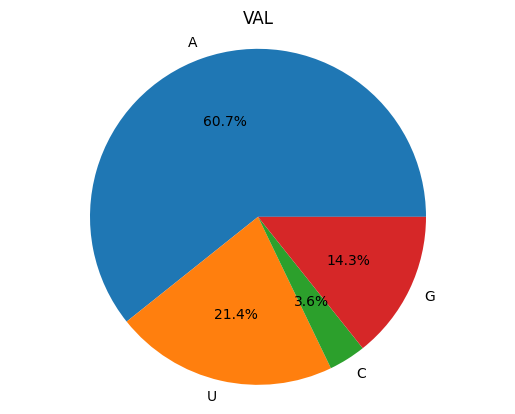

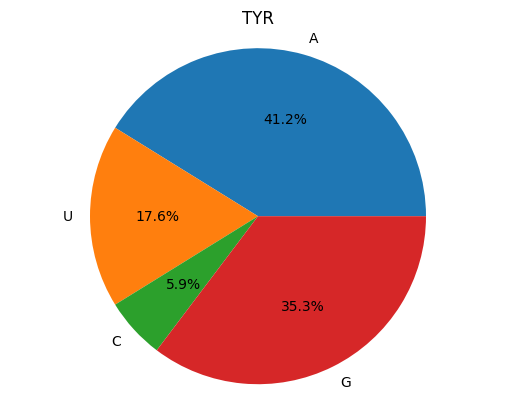

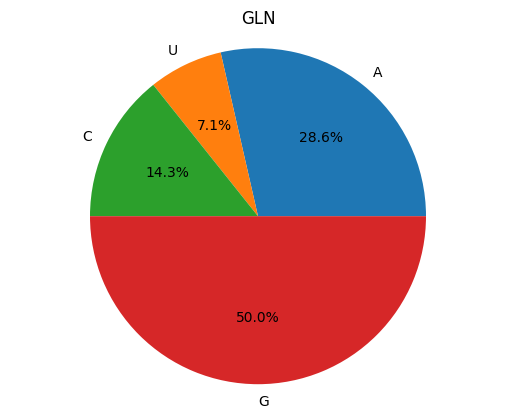

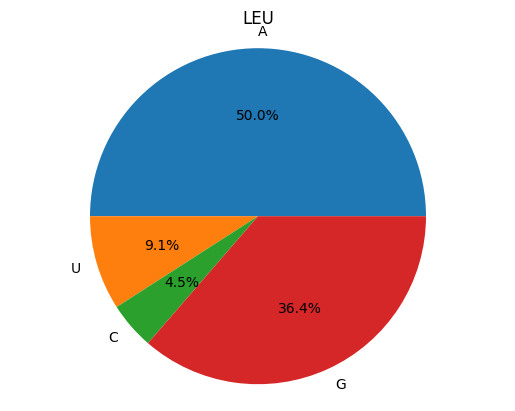

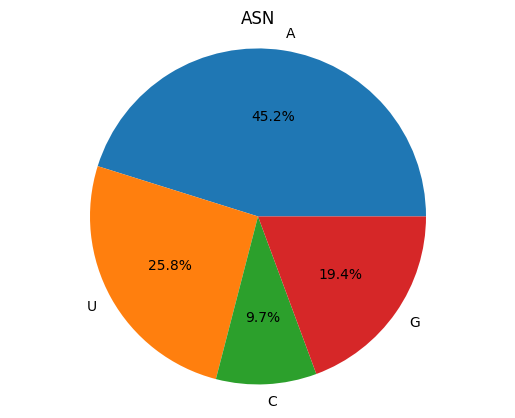

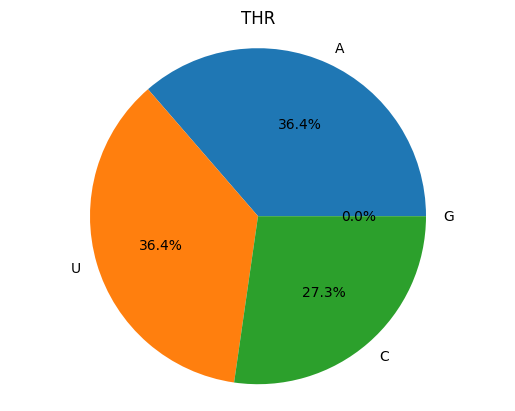

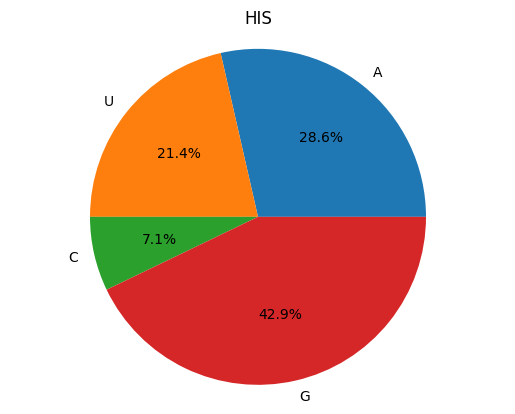

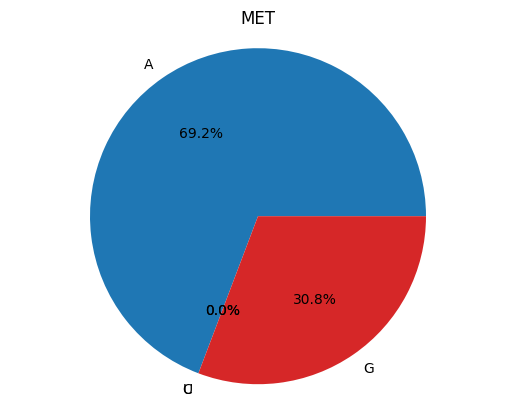

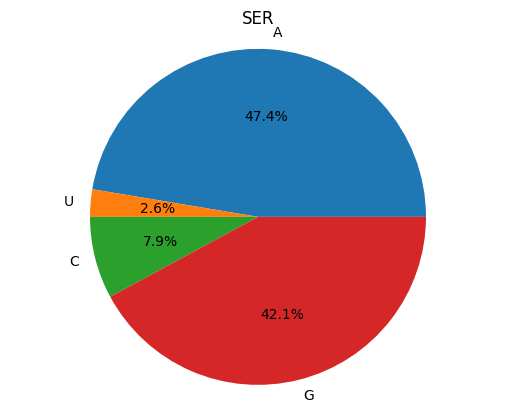

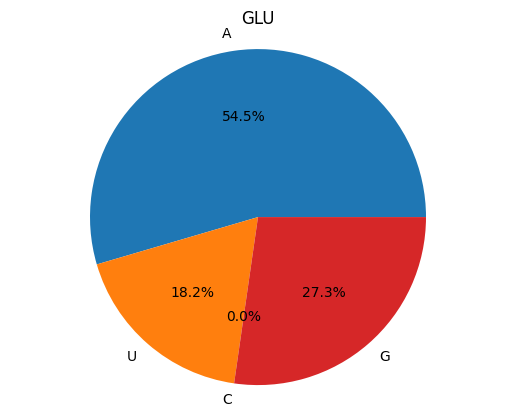

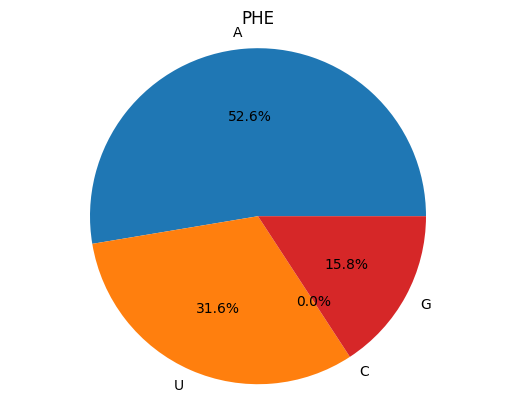

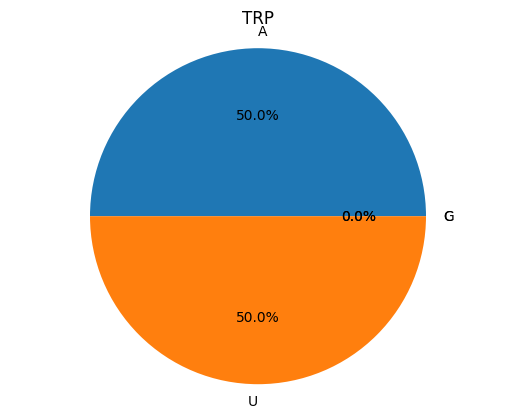

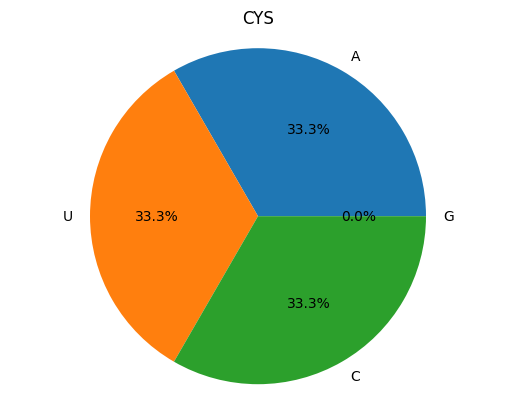

In [ ]:
import matplotlib.pyplot as plt

for indices, row in frequency_df.iterrows():
  fig1, ax1 = plt.subplots()
  plt.title(row['Aminoacid'])
  ax1.pie([
            row[nucleotides[0]],
            row[nucleotides[1]],
            row[nucleotides[2]],
            row[nucleotides[3]]
          ],
          labels=nucleotides,
          autopct='%1.1f%%')

  ax1.axis('equal')
  plt.show()

In [ ]:
def getListNumclAmin(nucleotide):
  resp = []
  for i in interactions:
    if i['to'] == nucleotide:
      resp.append(i['from'])

  return resp

interaction_stats = {}

for val in interactions:
  interaction_stats[val['to']] = getListNumclAmin(val['to'])

interaction_stats

{'C': ['ALA',
  'ARG',
  'ALA',
  'ILE',
  'GLY',
  'PRO',
  'GLY',
  'PRO',
  'GLY',
  'GLY',
  'ASN',
  'SER',
  'SER',
  'LYS',
  'GLY',
  'ALA',
  'ALA',
  'GLN',
  'THR',
  'GLY',
  'PRO',
  'ASP',
  'GLY',
  'ARG',
  'THR',
  'GLY',
  'ARG',
  'LYS',
  'GLY',
  'ALA',
  'LYS',
  'GLY',
  'GLY',
  'ARG',
  'LYS',
  'GLY',
  'GLY',
  'PRO',
  'LYS',
  'GLY',
  'ARG',
  'PRO',
  'PRO',
  'GLY',
  'LYS',
  'LEU',
  'GLN',
  'ARG',
  'GLY',
  'GLY',
  'LYS',
  'PRO',
  'GLY',
  'ASP',
  'GLY',
  'LYS',
  'ASN',
  'THR',
  'ARG',
  'ARG',
  'LYS',
  'ALA',
  'GLY',
  'GLY',
  'GLY',
  'ASN',
  'TYR',
  'ALA',
  'ALA',
  'LYS',
  'GLY',
  'CYS',
  'GLY',
  'LYS',
  'LYS',
  'HIS',
  'GLY',
  'SER',
  'PRO',
  'ILE',
  'VAL',
  'PRO',
  'LYS'],
 'U': ['GLY',
  'GLY',
  'ILE',
  'VAL',
  'ALA',
  'ARG',
  'ARG',
  'ARG',
  'GLU',
  'PRO',
  'ALA',
  'ASN',
  'LYS',
  'GLY',
  'ARG',
  'ARG',
  'ARG',
  'GLY',
  'GLY',
  'GLY',
  'GLY',
  'GLY',
  'ILE',
  'TYR',
  'GLY',
  'ALA',
  'ALA',

In [ ]:
frequencyNumclAmin = {}

for key, stat in interaction_stats.items():
  frequencyNumclAmin[key] = {
      aminoacids[0]: stat.count(aminoacids[0]),
      aminoacids[1]: stat.count(aminoacids[1]),
      aminoacids[2]: stat.count(aminoacids[2]),
      aminoacids[3]: stat.count(aminoacids[3]),
      aminoacids[4]: stat.count(aminoacids[4]),
      aminoacids[5]: stat.count(aminoacids[5]),
      aminoacids[6]: stat.count(aminoacids[6]),
      aminoacids[7]: stat.count(aminoacids[7]),
      aminoacids[8]: stat.count(aminoacids[8]),
      aminoacids[9]: stat.count(aminoacids[9]),
      aminoacids[10]: stat.count(aminoacids[10]),
      aminoacids[11]: stat.count(aminoacids[11]),
      aminoacids[12]: stat.count(aminoacids[12]),
      aminoacids[13]: stat.count(aminoacids[13]),
      aminoacids[14]: stat.count(aminoacids[14]),
      aminoacids[15]: stat.count(aminoacids[15]),
      aminoacids[16]: stat.count(aminoacids[16]),
      aminoacids[17]: stat.count(aminoacids[17]),
      aminoacids[18]: stat.count(aminoacids[18]),
      aminoacids[19]: stat.count(aminoacids[19])
  }

frequencyNumclAmin

{'C': {'ALA': 8,
  'ARG': 8,
  'ASN': 3,
  'ASP': 2,
  'CYS': 1,
  'GLN': 2,
  'GLU': 0,
  'GLY': 25,
  'HIS': 1,
  'LEU': 1,
  'ILE': 2,
  'LYS': 13,
  'MET': 0,
  'PHE': 0,
  'PRO': 9,
  'SER': 3,
  'THR': 3,
  'TRP': 0,
  'TYR': 1,
  'VAL': 1},
 'U': {'ALA': 6,
  'ARG': 20,
  'ASN': 8,
  'ASP': 3,
  'CYS': 1,
  'GLN': 1,
  'GLU': 2,
  'GLY': 30,
  'HIS': 3,
  'LEU': 2,
  'ILE': 8,
  'LYS': 9,
  'MET': 0,
  'PHE': 6,
  'PRO': 6,
  'SER': 1,
  'THR': 4,
  'TRP': 1,
  'TYR': 3,
  'VAL': 6},
 'G': {'ALA': 8,
  'ARG': 19,
  'ASN': 6,
  'ASP': 8,
  'CYS': 0,
  'GLN': 7,
  'GLU': 3,
  'GLY': 25,
  'HIS': 6,
  'LEU': 8,
  'ILE': 5,
  'LYS': 12,
  'MET': 4,
  'PHE': 3,
  'PRO': 5,
  'SER': 16,
  'THR': 0,
  'TRP': 0,
  'TYR': 6,
  'VAL': 4},
 'A': {'ALA': 26,
  'ARG': 19,
  'ASN': 14,
  'ASP': 4,
  'CYS': 1,
  'GLN': 4,
  'GLU': 6,
  'GLY': 24,
  'HIS': 4,
  'LEU': 11,
  'ILE': 9,
  'LYS': 13,
  'MET': 9,
  'PHE': 10,
  'PRO': 12,
  'SER': 18,
  'THR': 4,
  'TRP': 1,
  'TYR': 7,
  'VAL': 17}

In [ ]:
plot_frequency_data = []

for key, values in frequencyNumclAmin.items():
  plot_frequency_data.append(
      [
          key,
          frequencyNumclAmin[key]['ALA'],
          frequencyNumclAmin[key]['ARG'],
          frequencyNumclAmin[key]['ASN'],
          frequencyNumclAmin[key]['ASP'],
          frequencyNumclAmin[key]['CYS'],
          frequencyNumclAmin[key]['GLN'],
          frequencyNumclAmin[key]['GLU'],
          frequencyNumclAmin[key]['GLY'],
          frequencyNumclAmin[key]['HIS'],
          frequencyNumclAmin[key]['LEU'],
          frequencyNumclAmin[key]['ILE'],
          frequencyNumclAmin[key]['LYS'],
          frequencyNumclAmin[key]['MET'],
          frequencyNumclAmin[key]['PHE'],
          frequencyNumclAmin[key]['PRO'],
          frequencyNumclAmin[key]['SER'],
          frequencyNumclAmin[key]['THR'],
          frequencyNumclAmin[key]['TRP'],
          frequencyNumclAmin[key]['TYR'],
          frequencyNumclAmin[key]['VAL']
      ]
  )

frequency_df = pd.DataFrame (
    plot_frequency_data,
    columns = [
        'Nucleotide',
        'ALA',
        'ARG',
        'ASN',
        'ASP',
        'CYS',
        'GLN',
        'GLU',
        'GLY',
        'HIS',
        'LEU',
        'ILE',
        'LYS',
        'MET',
        'PHE',
        'PRO',
        'SER',
        'THR',
        'TRP',
        'TYR',
        'VAL'
    ]
)

frequency_df

Nucleotide  ALA  ARG  ASN  ASP  CYS  GLN  GLU  GLY  HIS  ...  ILE  LYS  MET  \
0          C    8    8    3    2    1    2    0   25    1  ...    2   13    0   
1          U    6   20    8    3    1    1    2   30    3  ...    8    9    0   
2          G    8   19    6    8    0    7    3   25    6  ...    5   12    4   
3          A   26   19   14    4    1    4    6   24    4  ...    9   13    9   

   PHE  PRO  SER  THR  TRP  TYR  VAL  
0    0    9    3    3    0    1    1  
1    6    6    1    4    1    3    6  
2    3    5   16    0    0    6    4  
3   10   12   18    4    1    7   17  

[4 rows x 21 columns]

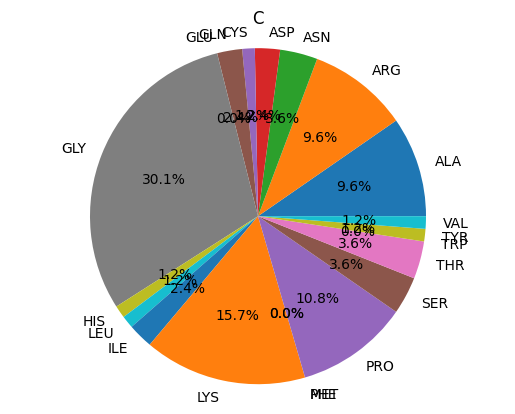

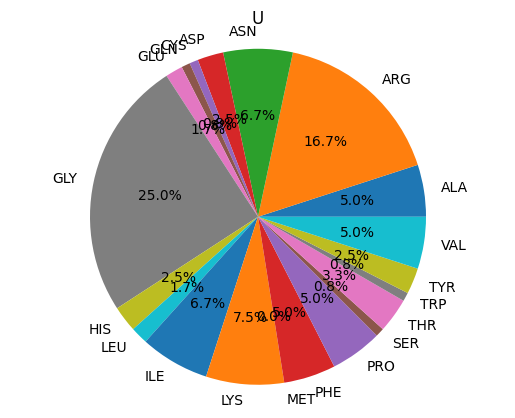

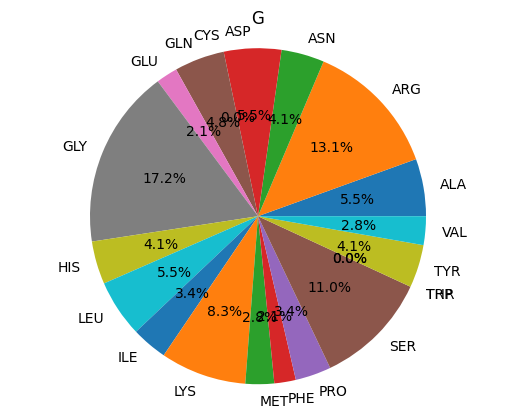

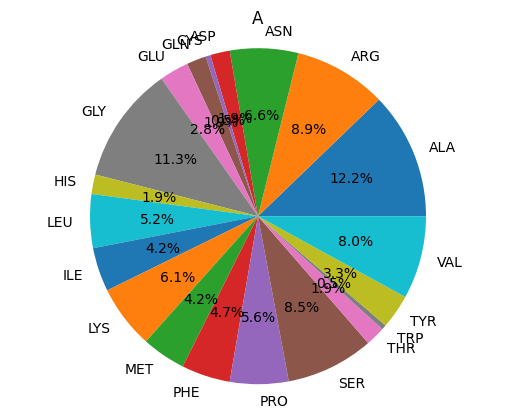

In [ ]:
for indices, row in frequency_df.iterrows():
  fig1, ax1 = plt.subplots()
  plt.title(row['Nucleotide'])
  ax1.pie([
            row[aminoacids[0]],
            row[aminoacids[1]],
            row[aminoacids[2]],
            row[aminoacids[3]],
            row[aminoacids[4]],
            row[aminoacids[5]],
            row[aminoacids[6]],
            row[aminoacids[7]],
            row[aminoacids[8]],
            row[aminoacids[9]],
            row[aminoacids[10]],
            row[aminoacids[11]],
            row[aminoacids[12]],
            row[aminoacids[13]],
            row[aminoacids[14]],
            row[aminoacids[15]],
            row[aminoacids[16]],
            row[aminoacids[17]],
            row[aminoacids[18]],
            row[aminoacids[19]]
          ],
          labels=aminoacids,
          autopct='%1.1f%%')

  ax1.axis('equal')
  plt.show()